In [14]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime, timedelta

# Configuration
SYMBOL = "USDJPY.sml"
TIMEFRAME = mt5.TIMEFRAME_H1
START_DATE = datetime(2009, 1, 1)
END_DATE = datetime(2025, 1, 1)
SAVE_PATH = f"../data/raw/oanda-usdjpy-h1-{START_DATE.date()}-{END_DATE.date()}.csv"

# Initialize MT5
if not mt5.initialize():
    print("❌ initialize() failed:", mt5.last_error())
    quit()

# Request historical rates
rates = mt5.copy_rates_range(
    SYMBOL,
    TIMEFRAME,
    START_DATE,
    END_DATE
)

# Shutdown MT5
mt5.shutdown()

# Convert to DataFrame
if rates is None or len(rates) == 0:
    print("❌ No data received.")
    quit()

df = pd.DataFrame(rates)

In [15]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,1230739200,90.800,90.870,90.620,90.710,285,30,0
1,1230742800,90.700,90.890,90.550,90.770,344,30,0
2,1230746400,90.780,90.850,90.710,90.760,517,30,0
3,1230750000,90.770,90.880,90.740,90.860,312,30,0
4,1230890400,91.170,91.240,91.100,91.210,344,30,0
...,...,...,...,...,...,...,...,...
99238,1735646400,156.644,156.966,156.612,156.836,13659,6,0
99239,1735650000,156.837,156.840,156.636,156.806,8071,6,0
99240,1735653600,156.806,156.898,156.556,156.896,10803,6,0
99241,1735657200,156.896,157.089,156.831,157.012,15134,6,0


In [16]:
import pandas as pd

# Assume df.index is the date (YYYYMMDD format), and 'time' is like HH:MM:SS
df = df.copy()
df['datetime'] = pd.to_datetime(df['time'], unit='s')

# Sort and check deltas
df = df.sort_values('datetime').reset_index(drop=True)
df['time_delta'] = df['datetime'].diff().dt.total_seconds()

# Find discontinuities (gap not equal to 3600 seconds)
discontinuities = df[df['time_delta'] != 3600]

# Show summary
print(f"Found {len(discontinuities)} time gaps.")
print(discontinuities[['datetime', 'time_delta']])


Found 862 time gaps.
                 datetime  time_delta
0     2008-12-31 16:00:00         NaN
4     2009-01-02 10:00:00    140400.0
17    2009-01-05 00:00:00    180000.0
136   2009-01-12 00:00:00    180000.0
255   2009-01-19 00:00:00    180000.0
...                   ...         ...
98866 2024-12-09 00:00:00    176400.0
98986 2024-12-16 00:00:00    176400.0
99106 2024-12-23 00:00:00    176400.0
99154 2024-12-26 00:00:00     90000.0
99202 2024-12-30 00:00:00    176400.0

[862 rows x 2 columns]


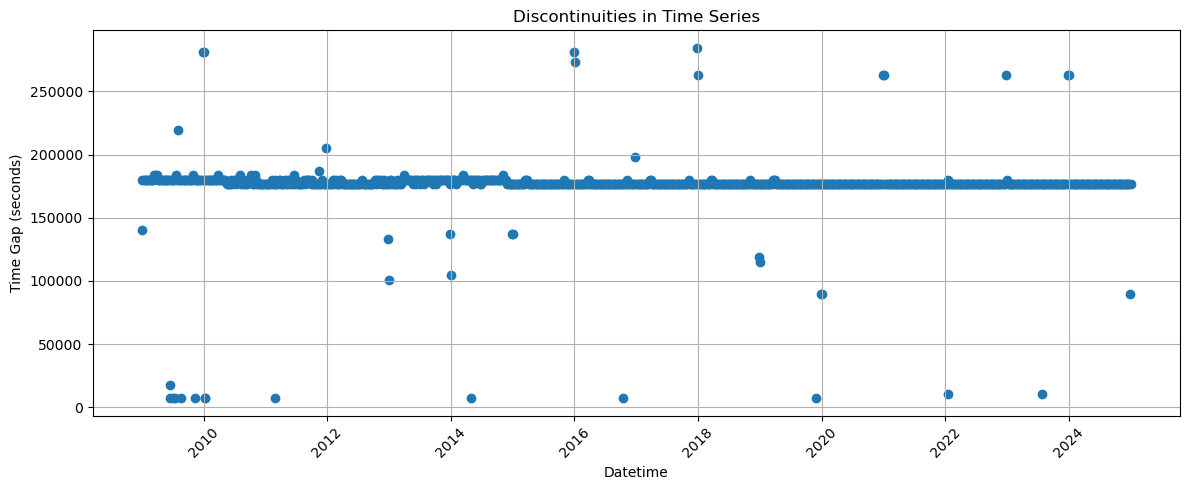

In [23]:
plt.figure(figsize=(12, 5))
plt.scatter(discontinuities['datetime'], discontinuities['time_delta'], marker='o')

plt.title("Discontinuities in Time Series")
plt.xlabel("Datetime")
plt.ylabel("Time Gap (seconds)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# Reorder columns
df = df[['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume']]

# Save to CSV
df.to_csv(SAVE_PATH, index=False)
print(f"✅ Saved: {SAVE_PATH}")

✅ Saved: ../data/raw/oanda-usdjpy-h1-2019-01-01-2025-01-01.csv
